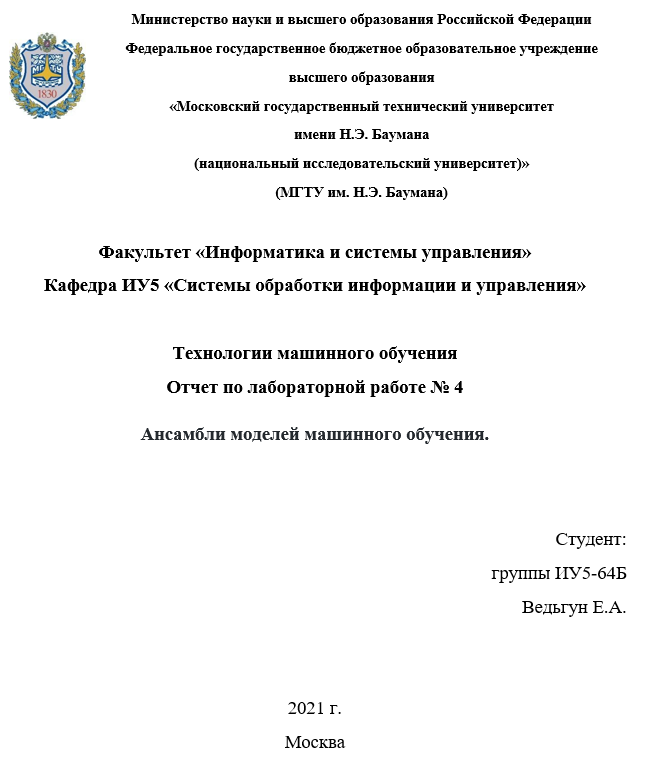

# Цель лабораторной работы: 
изучение ансамблей моделей машинного обучения.

# Задание:

1) Выберите набор данных (датасет) для решения задачи классификации или регресии.

2) В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.

3) С использованием метода train_test_split разделите выборку на обучающую и тестовую.

4) Обучите две ансамблевые модели. Оцените качество моделей с помощью одной из подходящих для задачи метрик. Сравните качество полученных моделей.

## | Задание 1 |

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import *
wine = load_wine()
pd_wine = pd.DataFrame(data= np.c_[wine['data'], wine['target']],
columns= wine['feature_names'] + ['target'])

## | Задание 2 |

In [7]:
pd_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


In [8]:
pd_wine.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

<AxesSubplot:>

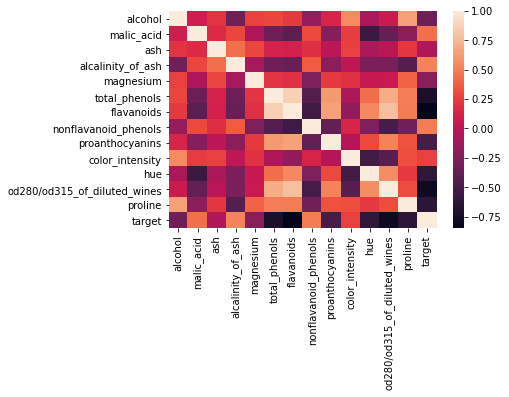

In [9]:
import seaborn as sns
sns.heatmap(pd_wine.corr())

## | Задание 3 |

In [17]:
from sklearn.model_selection import train_test_split 

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(
wine_sc, wine.target, test_size=0.33, random_state=1)

## | Задание 4 |
### Случайный лес

In [20]:
from sklearn.ensemble import RandomForestClassifier
tree1 = RandomForestClassifier(n_estimators=5, oob_score=True, random_state=10)
tree1.fit(X_train, Y_train)

C:\Users\mi\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\mi\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:544: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /


RandomForestClassifier(n_estimators=5, oob_score=True, random_state=10)

In [23]:
#Просмотрим количество данных не попавших в выборку бутстрэпа в процентах.
round((1-tree1.oob_score_)*100,2)

11.76

In [25]:
#Используем модель для предсказания
target1 = tree1.predict(X_test)

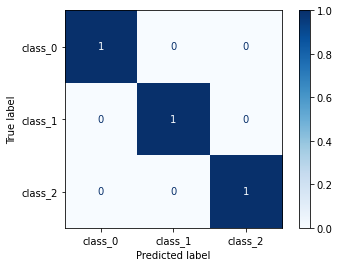

In [27]:
#Оценим полученную модель используя метрику Матрица ошибок
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
plot_confusion_matrix(tree1, X_test, Y_test,
display_labels=wine.target_names,
cmap=plt.cm.Blues, normalize='true')

### Градиентный бустинг
Данный метод так же предполагает последовательное многократное обучение модели с целью устранения ошибок обученных на
предыдуших этапах моделей. Основным методом здесь является градиентный спуск.
Решим задачу классификации для имеющихся данных.

In [28]:
from sklearn.ensemble import GradientBoostingClassifier
cl_gb = GradientBoostingClassifier(random_state=1)
cl_gb.fit(X_train, Y_train)

GradientBoostingClassifier(random_state=1)

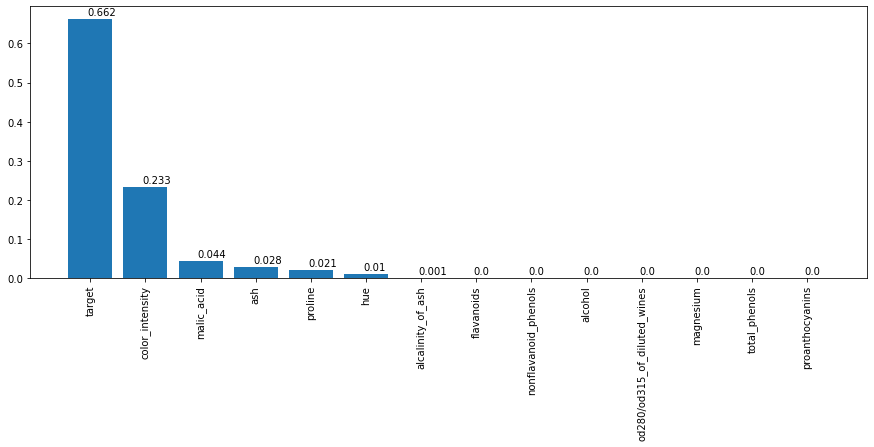

In [34]:
#Мы можем рассмотреть какие признаки повлияли на модель больше всего.
from operator import itemgetter
def draw_feature_importances(tree_model, X_dataset, figsize=(15,5)):
    # Сортировка значений важности признаков по убыванию
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    # Названия признаков
    labels = [x for x,_ in sorted_list]
    # Важности признаков
    data = [x for _,x in sorted_list]
    # Вывод графика
    fig, ax = plt.subplots(figsize=figsize)
    ind = np.arange(len(labels))
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    # Вывод значений
    for a,b in zip(ind, data):
        plt.text(a-0.05, b+0.01, str(round(b,3)))
    plt.show()
    return labels, data
_,_ = draw_feature_importances(cl_gb, pd_wine)